In [1]:
import numpy as np
import pandas as pd
import math
from sklearn import metrics
import datetime
import wrangle as w

from scipy.stats import entropy

import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates #to format dates on our plots
%matplotlib inline
import seaborn as sns

# This is to make sure matplotlib doesn't throw the following error:
# The next line fixes "TypeError: float() argument must be a string or a number, not 'Timestamp' matplotlib"
pd.plotting.register_matplotlib_converters()

In [2]:
#headers = ['col1', 'col2', 'col3', 'col4', 'col5', 'col6']
#dtypes = {'col1': 'str', 'col2': 'str', 'col3': 'str', 'col4': 'int', 'col5': 'float', 'col6': 'str'}
#parse_dates = ['col1', 'col2']

In [3]:
#df = pd.read_csv("anonymized-curriculum-access.txt", sep=' ', header=None, names=headers, dtype=dtypes)

In [18]:
#dfgz = pd.read_csv("anonymized-curriculum-access.txt.gz", compression='gzip', header=None, sep=' ', quotechar='"')

In [4]:
#df.head(2)

,col1,col2,col3,col4,col5,col6
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61


In [5]:
#df['date'] = df['col1']+ " " + df['col2']

In [6]:
#df.head(2)

,col1,col2,col3,col4,col5,col6,date
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,2018-01-26 09:55:03
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,2018-01-26 09:56:02


In [7]:
#df.date = pd.to_datetime(df.date)

In [9]:
#df = df.drop(columns=['col1', 'col2']).set_index('date').sort_index()

In [10]:
#df.head()

,col3,col4,col5,col6
date,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [6]:
#df[df['cohort'].isnull()]

,page,userid,cohort,ip
date,,,,
2018-01-26 16:46:16,/,48,NaN,97.105.19.61
2018-01-26 16:46:24,spring/extra-features/form-validation,48,NaN,97.105.19.61
2018-01-26 17:54:24,/,48,NaN,97.105.19.61
2018-01-26 18:32:03,/,48,NaN,97.105.19.61
2018-01-26 18:32:17,mysql/relationships/joins,48,NaN,97.105.19.61
...,...,...,...,...
2021-04-21 12:49:00,javascript-ii,717,NaN,136.50.102.126
2021-04-21 12:49:02,javascript-ii/es6,717,NaN,136.50.102.126
2021-04-21 12:51:27,javascript-ii/map-filter-reduce,717,NaN,136.50.102.126


In [8]:
#df['cohort'] = np.where(df.cohort.isnull(), 1337, df.cohort)

In [10]:
#df[df['cohort'] == 1337]

,page,userid,cohort,ip
date,,,,
2018-01-26 16:46:16,/,48,1337.0,97.105.19.61
2018-01-26 16:46:24,spring/extra-features/form-validation,48,1337.0,97.105.19.61
2018-01-26 17:54:24,/,48,1337.0,97.105.19.61
2018-01-26 18:32:03,/,48,1337.0,97.105.19.61
2018-01-26 18:32:17,mysql/relationships/joins,48,1337.0,97.105.19.61
...,...,...,...,...
2021-04-21 12:49:00,javascript-ii,717,1337.0,136.50.102.126
2021-04-21 12:49:02,javascript-ii/es6,717,1337.0,136.50.102.126
2021-04-21 12:51:27,javascript-ii/map-filter-reduce,717,1337.0,136.50.102.126


array([[<AxesSubplot:title={'center':'userid'}>,
        <AxesSubplot:title={'center':'cohort'}>]], dtype=object)

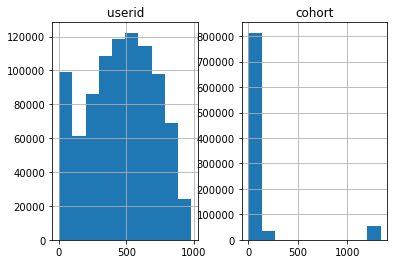

In [11]:
#df.hist()

___
# Cleaned up with a function

In [2]:
df = w.get_logs()

In [3]:
df.head(2)

,page,userid,cohort,ip
date,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 900223 entries, 2018-01-26 09:55:03 to 2021-04-21 16:44:39
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   page    900222 non-null  object 
 1   userid  900223 non-null  int64  
 2   cohort  900223 non-null  float64
 3   ip      900223 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 34.3+ MB


array([[<AxesSubplot:title={'center':'userid'}>,
        <AxesSubplot:title={'center':'cohort'}>]], dtype=object)

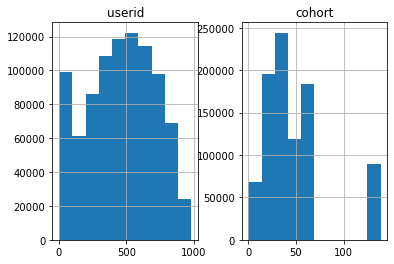

In [5]:
df.hist()

In [8]:
df.cohort.value_counts()

28.0     84031
0.0      52893
33.0     40730
29.0     38096
62.0     37109
53.0     36902
24.0     35636
57.0     33844
56.0     33568
51.0     32888
59.0     32015
22.0     30926
58.0     29855
32.0     29356
23.0     28534
52.0     28033
26.0     27749
34.0     26538
25.0     25586
31.0     25359
132.0    23691
55.0     21582
27.0     20743
61.0     17713
134.0    16623
135.0    16397
133.0    14715
14.0      9587
1.0       8890
137.0     8562
21.0      7444
138.0     7276
17.0      4954
13.0      2845
18.0      2158
8.0       1712
139.0     1672
19.0      1237
16.0       755
15.0       691
7.0        598
12.0       302
11.0       253
2.0         93
6.0         72
9.0          5
4.0          4
5.0          1
Name: cohort, dtype: int64

userid


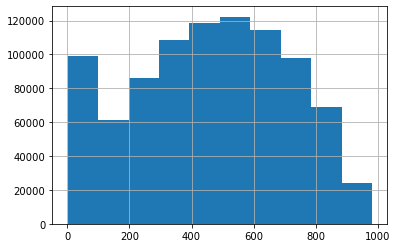

cohort


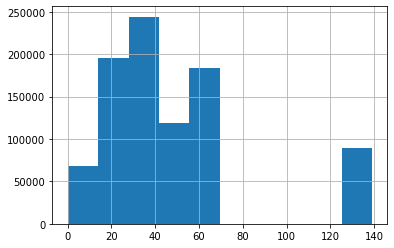

In [11]:
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        df[col].hist()
        print(col)
        plt.show()

In [14]:
columns = ['userid', 'cohort']

userid


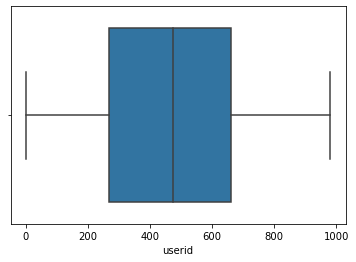

cohort


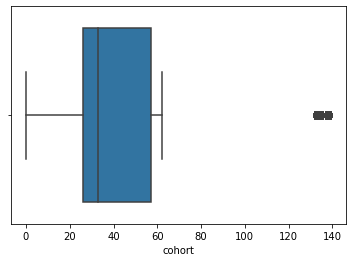

In [15]:
for col in columns:
    sns.boxplot(x=col, data=df)
    print(col)
    plt.show()

<AxesSubplot:xlabel='date'>

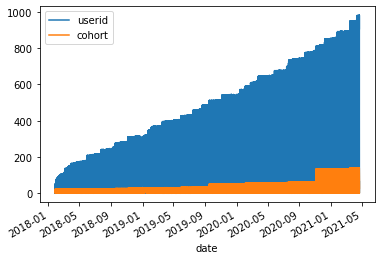

In [16]:
df.plot()

<AxesSubplot:xlabel='date'>

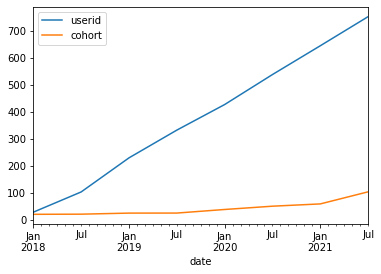

In [17]:
df.resample('6M').mean().plot()

In [18]:
df.userid.value_counts()

11     17913
64     16347
53     12329
314     7783
1       7404
       ...  
952        1
212        1
940        1
649        1
879        1
Name: userid, Length: 981, dtype: int64

In [23]:
df[df['ip'] == "104.190.255.174"]

,page,userid,cohort,ip
date,,,,
2020-12-08 10:50:46,/,842,133.0,104.190.255.174
2020-12-08 10:53:55,fundamentals/vocabulary,842,133.0,104.190.255.174
2020-12-08 10:56:13,fundamentals/intro-to-data-science,842,133.0,104.190.255.174
2020-12-08 10:56:14,fundamentals/modern-data-scientist.jpg,842,133.0,104.190.255.174
2020-12-08 10:56:14,fundamentals/AI-ML-DL-timeline.jpg,842,133.0,104.190.255.174
...,...,...,...,...
2021-04-21 08:45:17,classification/classical_programming_vs_machin...,842,133.0,104.190.255.174
2021-04-21 08:45:17,classification/scale_features_or_not.svg,842,133.0,104.190.255.174
2021-04-21 08:45:21,anomaly-detection/overview,842,133.0,104.190.255.174
